Sample Data:


,loan_amount,interest_rate,tenure_months,borrower_income,credit_score,default
0,599342.830602,11.974465,36,93057.144116,668.318091,0
1,472347.139766,13.566444,24,130161.406460,648.490808,0
2,629537.707620,11.622740,60,114007.198724,591.752235,0
3,804605.971282,13.076115,60,64449.919704,565.904777,1
4,453169.325055,8.319156,12,117959.479430,850.000000,0


Default Rate: 10.55%
Average Loan Size: 509,797
Total Portfolio Exposure: 1,019,593,694

Default Rate by Risk Segment:
risk_segment
High Risk    0.349633
Subprime     0.046740
Prime        0.035316
Low Risk     0.045833
Name: default, dtype: float64


/tmp/ipython-input-972217961.py:61: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis = data.groupby("risk_segment")["default"].mean()


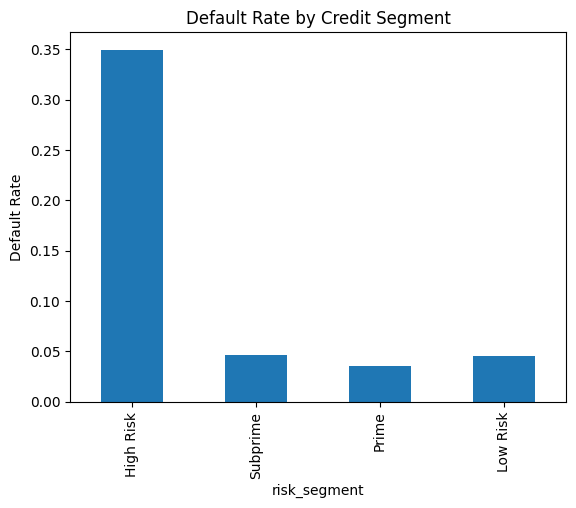


Model Performance:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       545
           1       0.67      0.18      0.29        55

    accuracy                           0.92       600
   macro avg       0.79      0.59      0.62       600
weighted avg       0.90      0.92      0.89       600


Key Observations:
- Avg Interest Rate (Defaulters): 15.50
- Avg Credit Score (Defaulters): 580
- Avg Income (Defaulters): 64,600


In [1]:
# CREDIT PORTFOLIO RISK & PERFORMANCE ANALYSIS
# Synthetic Banking Portfolio Project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

np.random.seed(42)

# -----------------------------
# 1. CREATE SYNTHETIC PORTFOLIO
# -----------------------------

n = 2000

data = pd.DataFrame({
    "loan_amount": np.random.normal(500000, 200000, n).clip(50000),
    "interest_rate": np.random.normal(14, 3, n).clip(5, 30),
    "tenure_months": np.random.choice([12, 24, 36, 48, 60], n),
    "borrower_income": np.random.normal(80000, 30000, n).clip(15000),
    "credit_score": np.random.normal(650, 80, n).clip(300, 850)
})

# Risk logic (simulated default behavior)
risk_factor = (
    (data["interest_rate"] > 18).astype(int) +
    (data["credit_score"] < 580).astype(int) +
    (data["borrower_income"] < 40000).astype(int)
)

data["default"] = (risk_factor + np.random.binomial(1, 0.2, n) >= 2).astype(int)

print("Sample Data:")
display(data.head())

# -----------------------------
# 2. PORTFOLIO HEALTH METRICS
# -----------------------------

default_rate = data["default"].mean()
avg_loan = data["loan_amount"].mean()
total_exposure = data["loan_amount"].sum()

print(f"Default Rate: {default_rate:.2%}")
print(f"Average Loan Size: {avg_loan:,.0f}")
print(f"Total Portfolio Exposure: {total_exposure:,.0f}")

# -----------------------------
# 3. RISK SEGMENTATION
# -----------------------------

data["risk_segment"] = pd.cut(
    data["credit_score"],
    bins=[300, 580, 670, 740, 850],
    labels=["High Risk", "Subprime", "Prime", "Low Risk"]
)

segment_analysis = data.groupby("risk_segment")["default"].mean()

print("\nDefault Rate by Risk Segment:")
print(segment_analysis)

segment_analysis.plot(kind="bar")
plt.title("Default Rate by Credit Segment")
plt.ylabel("Default Rate")
plt.show()

# -----------------------------
# 4. SIMPLE DEFAULT MODEL
# -----------------------------

features = ["loan_amount", "interest_rate", "tenure_months", "borrower_income", "credit_score"]
X = data[features]
y = data["default"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

preds = model.predict(X_test)

print("\nModel Performance:")
print(classification_report(y_test, preds))

# -----------------------------
# 5. BUSINESS INSIGHTS
# -----------------------------

high_risk = data[data["default"] == 1]

print("\nKey Observations:")
print(f"- Avg Interest Rate (Defaulters): {high_risk['interest_rate'].mean():.2f}")
print(f"- Avg Credit Score (Defaulters): {high_risk['credit_score'].mean():.0f}")
print(f"- Avg Income (Defaulters): {high_risk['borrower_income'].mean():,.0f}")



In [2]:

data.to_csv("credit_portfolio.csv", index=False)

print("CSV file created successfully.")

CSV file created successfully.
